## Clustering EastWest Airlines

## Hierarchical Clustering

In [51]:
# Importing Libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn


In [126]:
air = pd.read_excel('EastWestAirlines.xlsx', 'data')
air.head(20)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [161]:
air.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [35]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [36]:
air.drop(['ID#'], axis=1, inplace= True)

In [37]:
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [42]:
# Normalizing Function

def normal(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [45]:
air_norm = normal(air.iloc[:, 0:])
air_norm.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


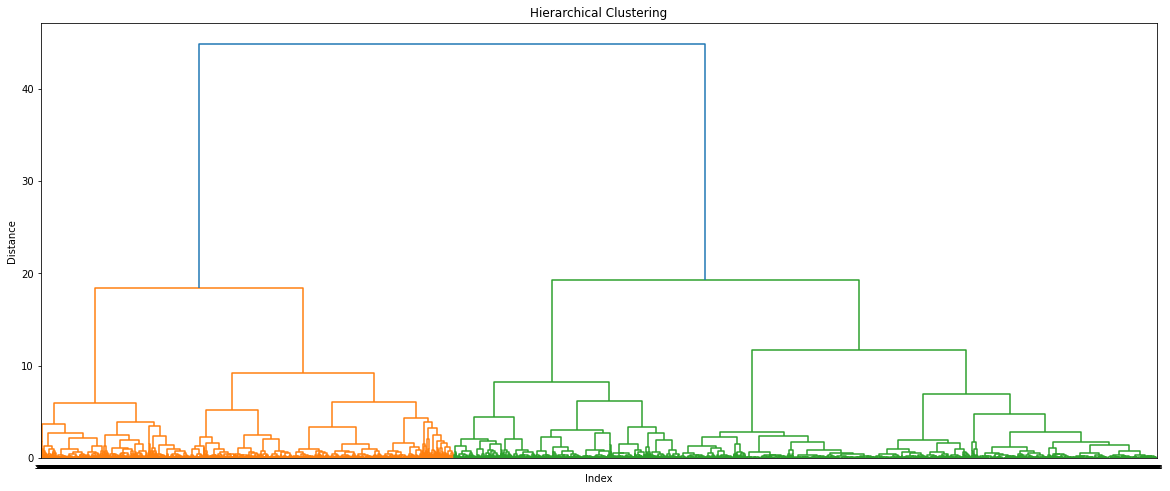

In [213]:
## Creating Dendrogram
from scipy.cluster.hierarchy import linkage
x = linkage(air_norm, method= 'ward', metric= 'euclidean')
plt.figure(figsize= (20, 8))
plt.title('Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(x,
              leaf_rotation= 0,
              leaf_font_size= 5, 
              show_contracted= True)

plt.show()


## Hierarchical Clustering

In [214]:

air_hc = AgglomerativeClustering(n_clusters=5, affinity= 'euclidean', linkage= 'average')

In [122]:
y_air_hc = air_hc.fit_predict(air_norm)
Clusters = pd.DataFrame(y_air_hc, columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [123]:
air['H_Clusters'] = air_hc.labels_

air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [124]:
air.groupby(air.H_Clusters).mean().round(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
H_Clusters,,,,,,,,,,,
0,95974.259,240.573,2.657,1.016,1.001,28342.703,15.547,804.153,2.462,4627.119,1.0
1,59807.840,87.602,1.705,1.014,1.009,10227.689,9.143,226.292,0.653,3820.652,0.0
2,1704838.000,0.000,1.000,1.000,1.000,17108.000,32.000,4823.000,23.000,7283.000,1.0
3,131999.500,347.000,2.500,1.000,1.000,65634.250,69.250,19960.000,49.250,2200.250,1.0
4,76565.125,147.750,3.875,1.000,4.250,115273.250,30.250,600.000,2.000,5127.875,1.0


## K-Mean Clustering

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [215]:
air_K_m = pd.read_excel('EastWestAirlines.xlsx', 'data')

In [216]:
air_K_m

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [217]:
# Dropping ID Column
air_K_m.drop(['ID#'], axis=1, inplace=True)
air_K_m.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


In [218]:
# Normalizing the Data

trans_KM = MinMaxScaler()
air_K_m_scaled = pd.DataFrame(trans_KM.fit_transform(air_K_m.iloc[:, 0:]))
air_K_m_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [219]:
## Within Cluster Sum of Squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, random_state= 1)
    kmeans.fit(air_K_m_scaled)
    wcss.append(kmeans.inertia_)
    

In [220]:
wcss

[1830.7932128584155,
 823.6756984125225,
 625.1690975109224,
 436.70946697317544,
 348.94332172541465,
 315.15027235201455,
 287.89516799050926,
 263.0494211531982,
 243.9155660366882,
 231.8086864162952]

In [ ]:
## Plotting Elbow Curve to identify the best K value

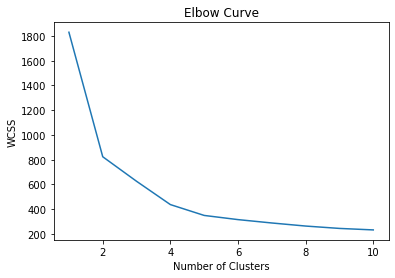

In [221]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [222]:
from kneed import KneeLocator

y = wcss
x = range(1, len(y)+1)

kn = KneeLocator(x, y, curve= 'convex', direction='decreasing')
print(kn.knee)

4


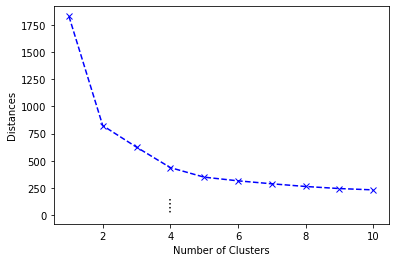

In [223]:
plt.plot(x, y, 'bx--')
plt.xlabel('Number of Clusters')
plt.ylabel('Distances')
plt.vlines(kn.knee, plt.ylim()[0], plt.xlim()[1], linestyles ='dotted')
plt.show()

In [232]:
## K-Mean Cluster Algorithm

Kmean_Clusters = KMeans(4, random_state= 20)
pred = Kmean_Clusters.fit(air_K_m_scaled)

In [233]:
Kmean_Clusters.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [234]:
air_K_m['Clusters_New'] = Kmean_Clusters.labels_

In [235]:
air_K_m

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_New
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [236]:
air_K_m.groupby('Clusters_New').agg(['mean']).reset_index()

,Clusters_New,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1
1,1,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0
2,2,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1
3,3,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0


In [229]:
air_K_m.groupby(air_K_m.Clusters_New).mean().round(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters_New,,,,,,,,,,,
0,83529.153,290.453,1.156,1.033,1.009,8850.395,10.477,1030.113,3.149,4338.868,1.0
1,40747.617,92.346,1.093,1.018,1.004,3335.153,6.489,226.600,0.659,3619.112,0.0
2,108317.387,198.337,3.916,1.001,1.026,45609.657,20.202,713.729,2.142,4863.439,1.0
3,118032.061,73.113,3.576,1.002,1.023,31282.667,17.251,225.353,0.633,4436.308,0.0


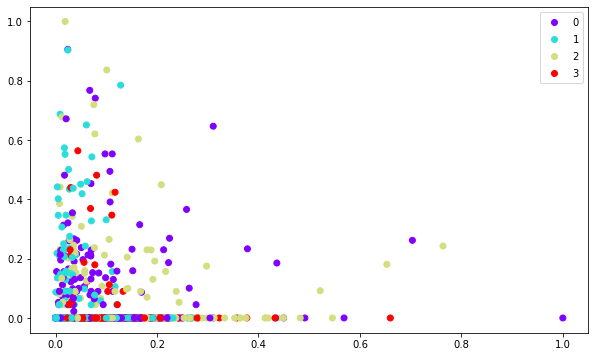

In [231]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(air_K_m_scaled.iloc[:,0],
           air_K_m_scaled.iloc[:,1],
           c=Kmean_Clusters.labels_,
           cmap='rainbow')
plt.legend(*scatter.legend_elements())

## Insights

#### Cluster 1 is group of customers who have done highest number of flight transactions and acquired flight miles in last 12 months. Investigate further and identify their needs.

#### Cluster 2 is set of the recently acquired customer group as the Days since enrollment is lowest and their flight transactions in last 12 months is also low.

#### Cluster 3 is the set of high vintage customers who have highest number of non-flight bonus transaction miles and highest miles eligible for award travel

#### Cluster 4 is also high vintage customers however their number of flight miles and flight transactions in last 12 months is alarmingly low. Bespoke offers to activate these customers is necessary.

